In [36]:
from gurobipy import GRB, Model, quicksum
import numpy as np


def solve_tsp(distance_matrix):
    n = len(distance_matrix)
    
    #create model, main and additional vars
    model = Model("TSP")
    
    x = model.addVars(n, n, vtype=GRB.BINARY, name="x")
    
    u = model.addVars(n, vtype=GRB.INTEGER, lb=1, ub=n-1, name="u")

    #cycle constraints
    
    model.addConstrs(quicksum(x[i, j] for j in range(n) if i != j) == 1 for i in range(n))

    model.addConstrs(quicksum(x[i, j] for i in range(n) if i != j) == 1 for j in range(n))

    # MTZ constraints 
    for i in range(1, n):
        for j in range(1, n):
            if i != j:
                model.addConstr(u[i] - u[j] + n * x[i, j] <= n - 1)

    model.setObjective(quicksum(distance_matrix[i][j] * x[i, j] for i in range(n) for j in range(n) if i != j), GRB.MINIMIZE)

    model.optimize()
    
    if model.status == GRB.OPTIMAL:
        tour = [(0, 0)]
        for i in range(1, n):
            tour.append((i, int(u[i].X)))
        sorted_tour = sorted(tour, key=lambda x: x[1])
        return model.objVal, sorted_tour
    else:
        return None, None
    
    
def main():
    
    distance_matrix = [
        [0, 10, 15, 20],
        [10, 0, 35, 25],
        [15, 35, 0, 30],
        [20, 25, 30, 0]
    ]


    obj_val, tour = solve_tsp(distance_matrix)
    
    if obj_val is not None:
        print(f"Минимальная длина маршрута: {obj_val}")
        print("Маршрут:")
        for node in tour:
            print(node[0], end=' ')
    else:
        print("Не удалось найти оптимальное решение")

if __name__ == "__main__":
    main()


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 14 rows, 20 columns and 42 nonzeros
Model fingerprint: 0xba9355b3
Variable types: 0 continuous, 20 integer (16 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [1e+01, 4e+01]
  Bounds range     [1e+00, 3e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 95.0000000
Presolve removed 0 rows and 5 columns
Presolve time: 0.01s
Presolved: 14 rows, 15 columns, 42 nonzeros
Variable types: 0 continuous, 15 integer (12 binary)

Root relaxation: objective 8.000000e+01, 11 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     

In [37]:
def distance(coords):
    n = len(coords)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            matrix[i][j] = np.sqrt((coords[i][0]-coords[j][0])**2+(coords[i][1]-coords[j][1])**2)
            matrix[j][i] = matrix[i][j]
    return matrix


coords = [(0, 0), (4, 0), (6, -5), (5, -7), (1, 2), (4, -5), (3, 2)]
distance_matrix = distance(coords)
obj_val, tour = solve_tsp(distance_matrix)
    
if obj_val is not None:
    print(f"Минимальная длина маршрута: {obj_val}")
    print("Маршрут:")
    for node in tour:
        print(node[0], end=' ')
else:
        print("Не удалось найти оптимальное решение")

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 44 rows, 56 columns and 174 nonzeros
Model fingerprint: 0x68ba946f
Variable types: 0 continuous, 56 integer (49 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+00]
  Objective range  [2e+00, 1e+01]
  Bounds range     [1e+00, 6e+00]
  RHS range        [1e+00, 6e+00]
Found heuristic solution: objective 28.3284880
Presolve removed 0 rows and 8 columns
Presolve time: 0.01s
Presolved: 44 rows, 48 columns, 174 nonzeros
Variable types: 0 continuous, 48 integer (42 binary)

Root relaxation: objective 1.592570e+01, 17 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0   

In [38]:
import random

coords = [(random.randint(0, 1000), random.randint(0, 1000)) for _ in range(40)]

print(coords)

distance_matrix = distance(coords)
obj_val, tour = solve_tsp(distance_matrix)


path = []
if obj_val is not None:
    print(f"Минимальная длина маршрута: {obj_val}")
    print("Маршрут:")
    for node in tour:
        path.append(node[0])
    print(path)

else:
        print("Не удалось найти оптимальное решение")




[(179, 337), (981, 291), (169, 183), (59, 8), (974, 564), (90, 678), (734, 288), (506, 518), (248, 120), (557, 322), (433, 207), (365, 925), (791, 177), (137, 424), (857, 395), (317, 747), (24, 502), (515, 770), (718, 994), (883, 922), (66, 678), (66, 624), (788, 380), (307, 175), (245, 186), (966, 834), (408, 674), (789, 980), (341, 351), (317, 203), (259, 128), (372, 97), (245, 418), (593, 465), (293, 214), (51, 225), (598, 930), (955, 332), (673, 917), (966, 145)]
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1562 rows, 1640 columns and 7566 nonzeros
Model fingerprint: 0xbb37762e
Variable types: 0 continuous, 1640 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e+01, 1e+03]
  Bounds range     [1e+00, 4e+01]
  RHS 

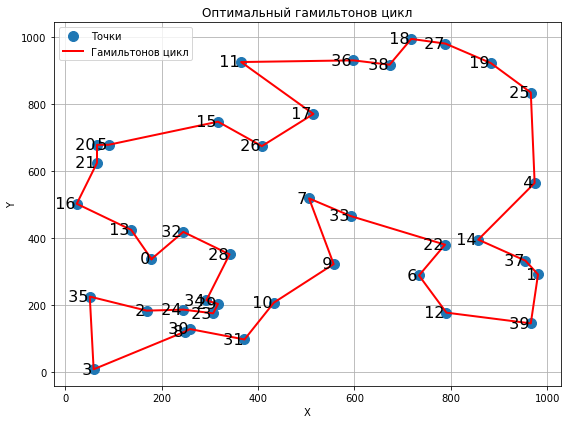

In [42]:
import matplotlib.pyplot as plt

def visualize_tour(points, tour):
    '''Функция для визуализации полученного маршрута'''
    x_coords, y_coords = zip(*points)
    
    # Добавление первой точки в конец тура для замыкания цикла
    tour.append(tour[0])
    
    tour_x = [x_coords[i] for i in tour]
    tour_y = [y_coords[i] for i in tour]
    
    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, 'o', markersize=10, label='Точки')
    plt.plot(tour_x, tour_y, 'r-', linewidth=2, label='Гамильтонов цикл')
    
    for i, (x, y) in enumerate(points):
        plt.text(x-3, y, f'  {i}', fontsize=16, ha='right', va='center')
    
    plt.title('Оптимальный гамильтонов цикл')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

visualize_tour(coords, path)
